### 0. 데이터 전처리 및 정리

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('C:/dataset/ranked_lose_team_game_edit.csv')
df2 = pd.read_csv('C:/dataset/ranked_win_team_game_edit.csv')

#df3 = pd.read_csv('match_data_version1.csv')
### match_data_version1 에 팀별 win/lose data 추가

df = pd.concat([df1,df2], ignore_index=True)
df.head

<bound method NDFrame.head of               gameId  gameDuration  teamId   win  firstBlood  firstTower  \
0       4.247263e+09        1323.0     100  Fail        True       False   
1       4.247156e+09        1317.0     200  Fail        True        True   
2       4.243963e+09         932.0     100  Fail       False       False   
3       4.241678e+09        2098.0     100  Fail       False       False   
4       4.241539e+09        2344.0     200  Fail       False       False   
...              ...           ...     ...   ...         ...         ...   
154167  4.039738e+09         934.0     200   Win        True        True   
154168  4.170286e+09        1418.0     100   Win        True       False   
154169  4.136207e+09         933.0     100   Win        True        True   
154170  4.130964e+09        1544.0     100   Win        True       False   
154171  4.119954e+09        2090.0     100   Win       False       False   

        firstInhibitor  firstBaron  firstDragon  firstRif

In [3]:
#데이터 공백 값 0으로 반환
df = df.fillna(0)
df.isnull().sum().sum()

0

### 1. 승리팀 평균치, 패배팀 평균치 비교

In [4]:
df.describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,154172.000000,154172.000000,154172.000000,154172.000000
mean,4.493546,0.599344,0.355525,1.599006
std,3.430479,0.869789,0.570551,1.251596
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,4.000000,0.000000,0.000000,2.000000
75%,7.000000,1.000000,1.000000,2.000000
max,11.000000,10.000000,5.000000,7.000000


In [5]:
df[df['win'] == 'Fail'].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,77086.000000,77086.000000,77086.000000,77086.000000
mean,1.879148,0.079340,0.123563,0.937044
std,1.963513,0.368275,0.374896,1.025873
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,2.000000
max,11.000000,6.000000,4.000000,6.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

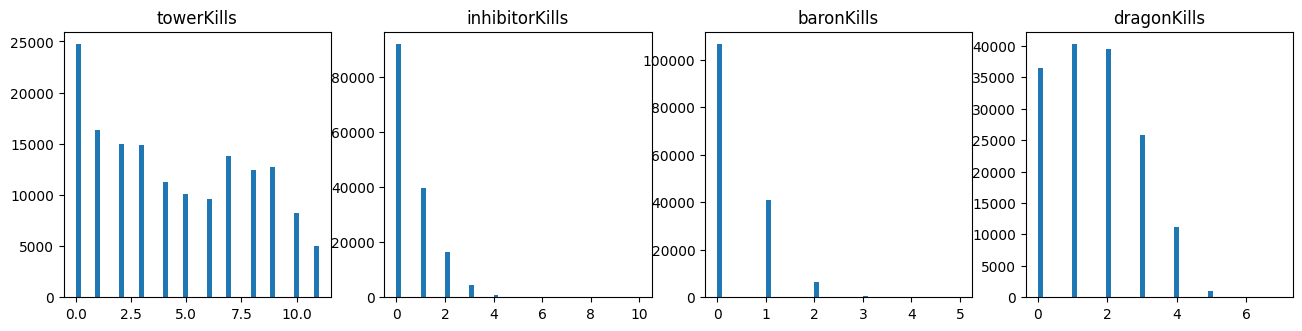

In [8]:
df_hist = df[['towerKills','inhibitorKills','baronKills','dragonKills']]

def plot_hist_each_column(df_hist):
    plt.rcParams['figure.figsize'] = [20,20]
    fig = plt.figure()
    for i in range(len(df_hist.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df_hist[df_hist.columns[i]], bins=50)
        ax.set_title(df_hist.columns[i])
    plt.show()

plot_hist_each_column(df_hist)

### 2. 승리팀 중요 변수 확인

In [18]:
# 숫자형 데이터 제거, 퍼스트 데이터만 요인 분석
df_first = df.drop(["towerKills","inhibitorKills","baronKills",
         "dragonKills","vilemawKills","riftHeraldKills",
         "dominionVictoryScore","gameId","teamId"], axis=1)

df_first.head

<bound method NDFrame.head of         gameDuration   win  firstBlood  firstTower  firstInhibitor  \
0             1323.0  Fail        True       False           False   
1             1317.0  Fail        True        True           False   
2              932.0  Fail       False       False           False   
3             2098.0  Fail       False       False           False   
4             2344.0  Fail       False       False           False   
...              ...   ...         ...         ...             ...   
154167         934.0   Win        True        True           False   
154168        1418.0   Win        True       False            True   
154169         933.0   Win        True        True            True   
154170        1544.0   Win        True       False           False   
154171        2090.0   Win       False       False           False   

        firstBaron  firstDragon  firstRiftHerald  ban_champion_1  \
0            False        False            False            -

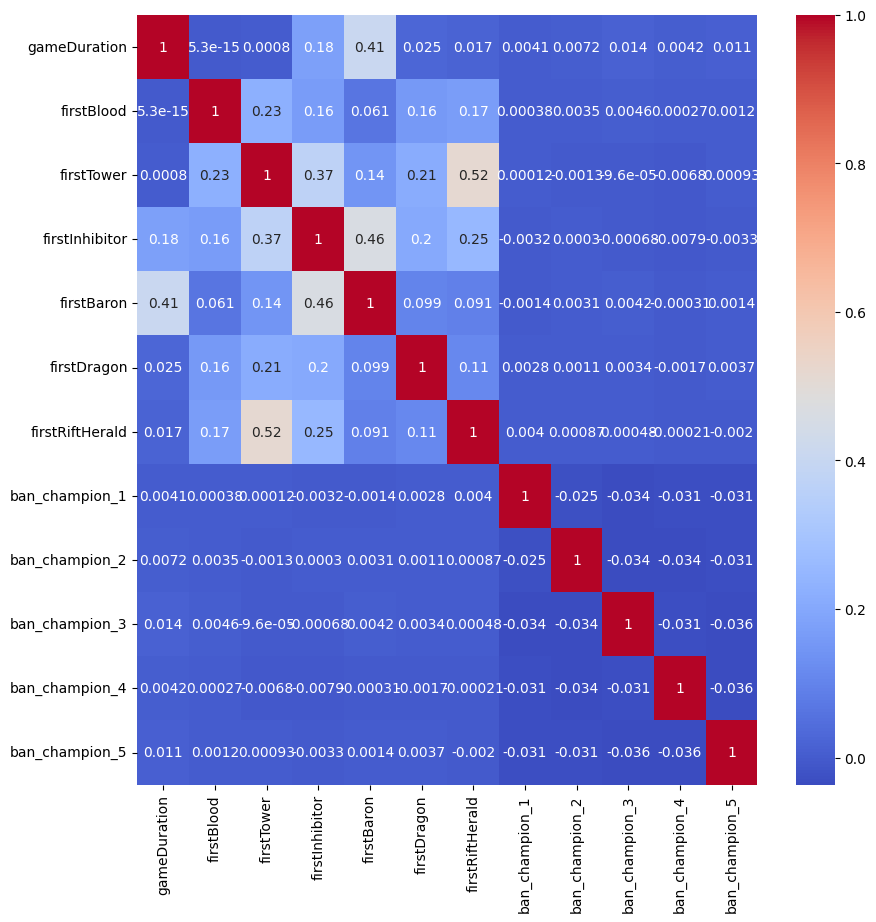

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#항목별 상관도 확인
plt.figure(figsize=(10,10))
sns.heatmap(df_first.corr(),cmap='coolwarm',annot=True)
plt.show()

In [22]:
df_first['win'] = df['win'].replace({'Win':1, 'Fail':0})
df_first["firstBlood"] = df["firstBlood"].astype(int)
df_first["firstTower"] = df["firstTower"].astype(int)
df_first["firstInhibitor"] = df["firstInhibitor"].astype(int)
df_first["firstDragon"] = df["firstDragon"].astype(int)
df_first["firstBaron"] = df["firstBaron"].astype(int)
df_first["firstRiftHerald"] = df["firstRiftHerald"].astype(int)

In [23]:
df_first.groupby('win').mean()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,ban_champion_1,ban_champion_2,ban_champion_3,ban_champion_4,ban_champion_5
win,,,,,,,,,,,,
0,1480.825117,0.390006,0.259048,0.045689,0.091210,0.344680,0.332603,183.782023,183.668747,186.149106,187.473445,188.611719
1,1480.825117,0.609994,0.740355,0.707599,0.472433,0.641738,0.630906,183.522300,184.705070,185.620203,185.648678,188.497380


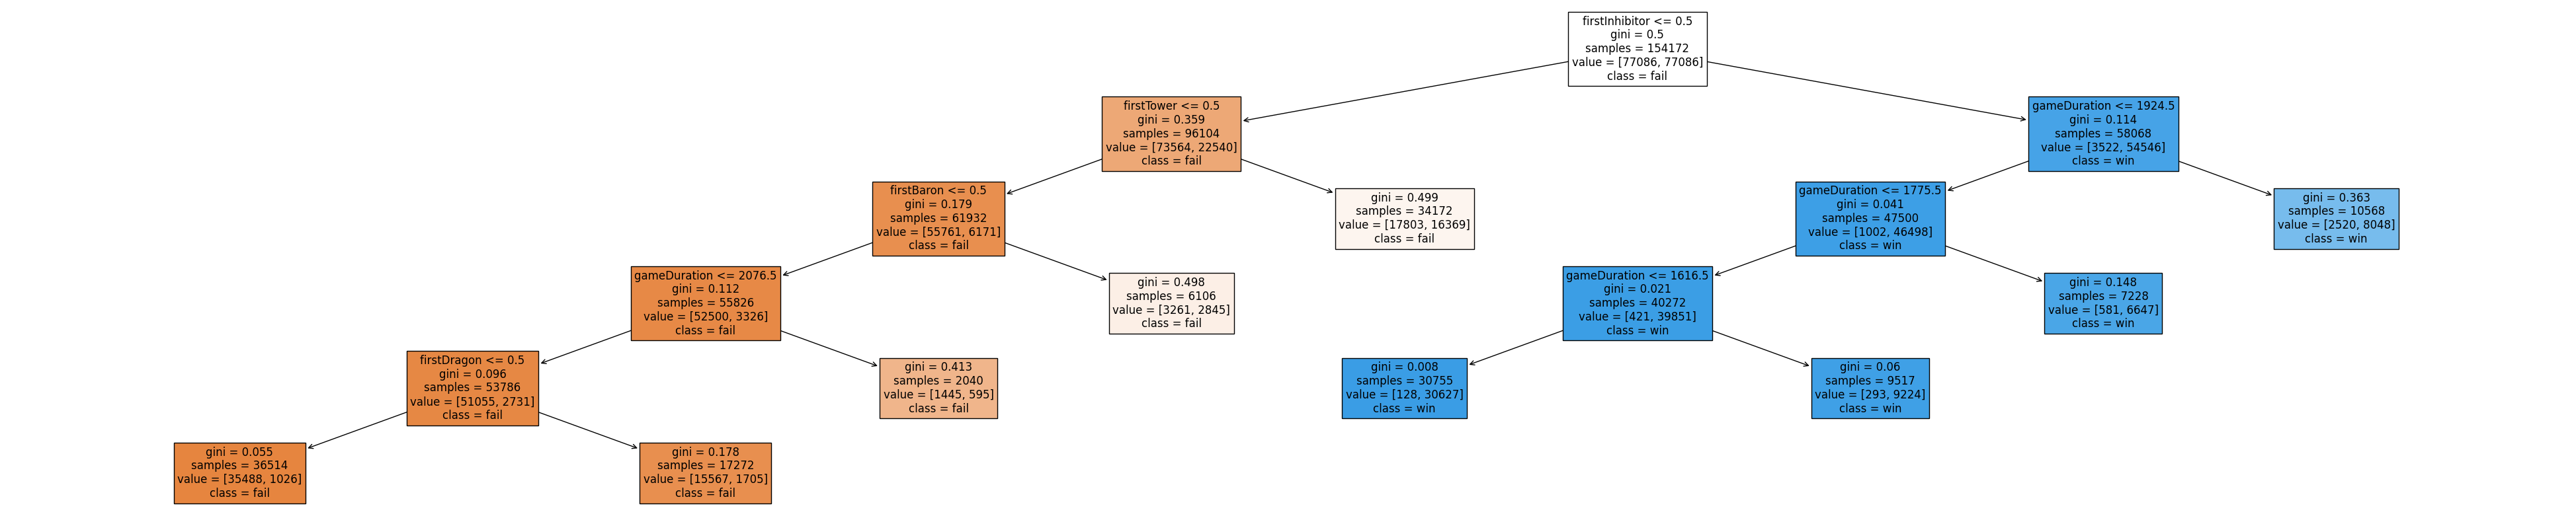

In [24]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X = df_first.drop(['win'], axis=1)
y = df_first['win']
xname = X.columns
yname = ['fail','win']

c_tree = DecisionTreeClassifier(min_samples_split=40000,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(50,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()


### 3. 경기 시간 segment 별 EDA

### 4. 앙상블 분석 : 승리 예측 정확도 비교

     4.1 랜덤포레스트

In [25]:
# df 전체 win / fail -> 1 / 0 으로 바꿔줌
df['win'] = df['win'].replace({'Win':1, 'Fail':0})

In [26]:
from sklearn.model_selection import train_test_split

X = df[['firstBlood', 'firstTower',
       'firstBaron', 'firstDragon', 'firstInhibitor', 'dragonKills',
       'baronKills', 'towerKills', 'inhibitorKills']]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=123456)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

#oob_score = out of bag score로써 예측이 얼마나 정확한가에 대한 추정치입니다.
print(f'랜덤포레스트 테스트 정확도=  : {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')


랜덤포레스트 테스트 정확도=  : 0.884
Mean accuracy score: 0.883


    4.2 GradientBoosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train,y_train)

y_pred = clf_gbc.predict(X_test)

print('GradientBoosting 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))

GradientBoosting 테스트 정확도 = 0.8830656669174688


    4.3 Xgboost

In [31]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot

In [32]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

print('Xgboost 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))#정확도 계산

Xgboost 테스트 정확도 = 0.885997457385258


    4.4 변수 중요도 체크

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

 1)firstBlood                    0.386597
 2)firstTower                    0.198951
 3)firstBaron                    0.160988
 4)firstDragon                   0.092747
 5)firstInhibitor                0.082058
 6)dragonKills                   0.029657
 7)baronKills                    0.019687
 8)towerKills                    0.018123
 9)inhibitorKills                0.011190


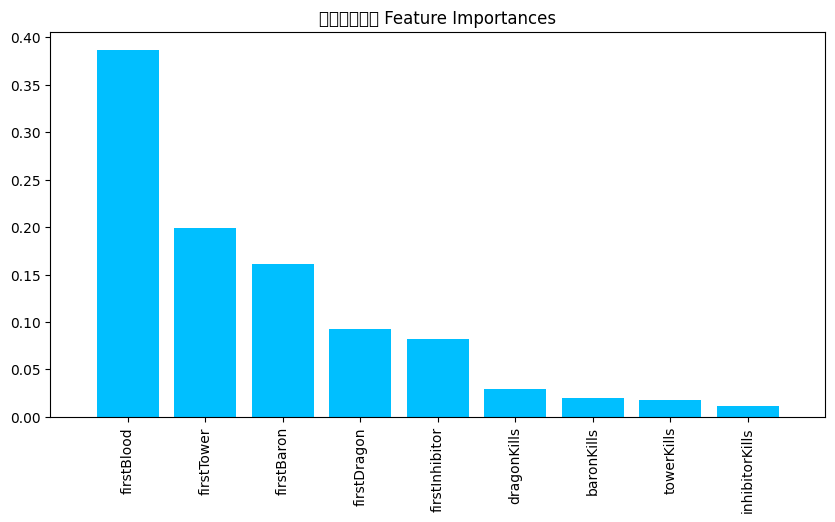

In [33]:
# 랜덤포레스트 변수 중요도
plt.figure(figsize=(10,5))

features_label = X.columns
rf_importances = rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]
for i in range(X.shape[1]):
     print('%2d)%-*s%f'%(i+1, 30, features_label[i], rf_importances[indices[i]]))
plt.title('랜덤포레스트 Feature Importances')
plt.bar(range(X.shape[1]), rf_importances[indices], color='deepskyblue', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

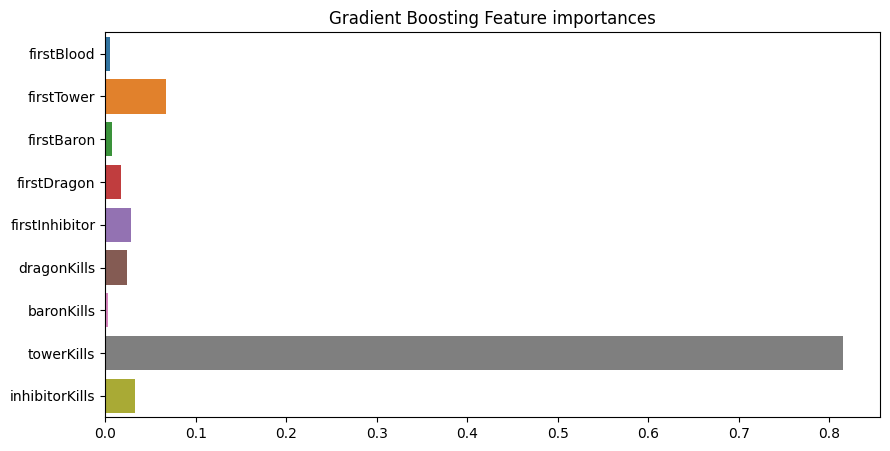

In [34]:
# Gradient Boosting 변수 중요도
plt.figure(figsize=(10,5))

gb_importances = clf_gbc.feature_importances_
gb_importances = pd.Series(gb_importances, index = X_train.columns)

plt.title('Gradient Boosting Feature importances')
sns.barplot(x=gb_importances, y=X_train.columns)
plt.show()

<AxesSubplot: title={'center': 'xgboost Feature importances'}, xlabel='F score', ylabel='Features'>

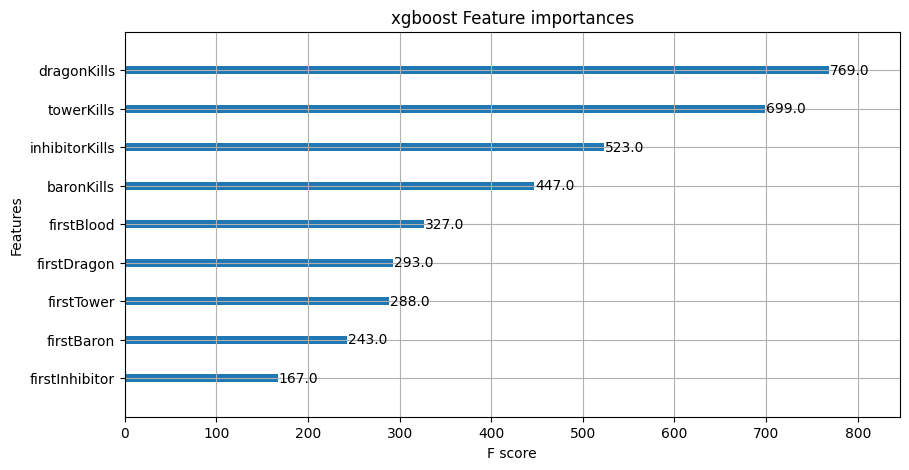

In [35]:
# xgboost 변수 중요도

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_model, title='xgboost Feature importances', ax=ax)

### 5. 로지스틱 회귀분석